### Projet de modélisation de détresse financière

Dans ce kernel, nous allons nous intéressez au problème de stress financier auquel sont exposé les entreprise

Pour ce faire, nous allons analyser un ensemble de données issues d'une ancienne compétition kaggle. L'ensemble des données traite de la prévision de détresse financière pour un échantillon d’entreprises. Mais avons, commencer par définir la notion de détressae financière afin de mieux cerner l'enjeux métier.

### Fiancial stress analysis

Les crises financières causent des ravages économiques, sociaux et politiques. Les politiques macroprudentielles gagnent du terrain, mais sont encore très peu étudiées par rapport à la politique monétaire et à la politique budgétaire. Nous utilisons le cadre général des prédictions séquentielles également appelé apprentissage automatique en ligne pour prévoir les crises hors échantillon.

Le risque systémique financier est une question importante dans les systèmes économiques et financiers. En essayant de détecter et de réagir au risque systémique avec des quantités croissantes de données produites sur les marchés financiers et les systèmes, beaucoup de chercheurs ont de plus en plus utilisé des méthodes d’apprentissage automatique. Les méthodes d’apprentissage automatique étudient les mécanismes d’éclosion et de contagion du risque systémique dans le réseau financier et améliorent la réglementation actuelle du marché financier et de l’industrie. 

Ainsi dans ce kernel, nous nous basons sur les recherches et méthodologies existantes sur l’évaluation et la mesure du risque systémique financier combinées aux technologies d’apprentissage automatique, y compris l’analyse du Big Data, l’analyse du réseau et l’analyse des sentiments. Maintenant, intéressons nous aux données Kaggle.

#### Description des données

Company: La société représente des entreprises échantillonnées.

Time : Le temps montre différentes périodes de temps à laquelle appartiennent les données. La durée des séries horaires varie entre 1 et 14 pour chaque entreprise.

Fiancial Ditress: La variable cible est indiquée par «détresse financière» si elle sera supérieure à -0,50, l’entreprise doit être considérée comme saine (0). Dans le cas contraire, il serait considéré comme financièrement en difficulté (1).

Le rete des colonnes : Les caractéristiques indiquées par x1 à x83, sont quelques caractéristiques financières et non financières des sociétés échantillonnées. Ces caractéristiques appartiennent à la période précédente, qui devrait être utilisée pour prédire si l’entreprise sera financièrement en difficulté ou non (classification). Caractéristique x80 est variable catégorique.

In [1]:
#Import de librairies nécessaire
import sys
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier

%matplotlib inline


# Sklearn imports
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import f1_score, recall_score
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import TimeSeriesSplit

In [2]:
df=pd.read_csv('financial stress.csv')
df.head(20)

,Company,Time,Financial Distress,x1,x2,x3,x4,x5,x6,x7,...,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83
0,1,1,0.010636,1.28100,0.022934,0.87454,1.21640,0.060940,0.188270,0.52510,...,85.437,27.07,26.102,16.000,16.0,0.2,22,0.060390,30,49
1,1,2,-0.455970,1.27000,0.006454,0.82067,1.00490,-0.014080,0.181040,0.62288,...,107.090,31.31,30.194,17.000,16.0,0.4,22,0.010636,31,50
2,1,3,-0.325390,1.05290,-0.059379,0.92242,0.72926,0.020476,0.044865,0.43292,...,120.870,36.07,35.273,17.000,15.0,-0.2,22,-0.455970,32,51
3,1,4,-0.566570,1.11310,-0.015229,0.85888,0.80974,0.076037,0.091033,0.67546,...,54.806,39.80,38.377,17.167,16.0,5.6,22,-0.325390,33,52
4,2,1,1.357300,1.06230,0.107020,0.81460,0.83593,0.199960,0.047800,0.74200,...,85.437,27.07,26.102,16.000,16.0,0.2,29,1.251000,7,27
5,2,2,0.007188,1.05580,0.081916,0.87949,0.68673,0.142630,0.043102,0.77198,...,107.090,31.31,30.194,17.000,16.0,0.4,29,1.357300,8,28
6,2,3,1.200200,0.97059,0.076064,0.90677,0.80980,0.165920,-0.024649,0.73660,...,120.870,36.07,35.273,17.000,15.0,-0.2,29,0.007188,9,29
7,2,4,2.234800,1.05900,0.130200,0.81811,0.87599,0.234450,0.045576,0.78727,...,54.806,39.80,38.377,17.167,16.0,5.6,29,1.200200,10,30
8,2,5,1.340500,1.12450,0.147840,0.75871,1.07990,0.276440,0.089408,0.80356,...,59.806,44.53,42.822,15.500,14.0,2.1,29,2.234800,11,31
9,2,6,2.047400,1.59980,0.262460,0.54615,1.31270,0.369480,0.296640,0.85364,...,66.262,52.74,49.206,15.500,12.0,-6.4,29,1.340500,12,32


Par exemple, l’entreprise 1 est en difficulté financière à l’époque 4, mais l’entreprise 2 est toujours en bonne santé au moment 14.

In [3]:
#Vérification de la présence de donnée manquantes

print("Total missing values:", df.isna().sum().sum())

Total missing values: 0


In [4]:
df.shape

(3672, 86)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3672 entries, 0 to 3671
Data columns (total 86 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Company             3672 non-null   int64  
 1   Time                3672 non-null   int64  
 2   Financial Distress  3672 non-null   float64
 3   x1                  3672 non-null   float64
 4   x2                  3672 non-null   float64
 5   x3                  3672 non-null   float64
 6   x4                  3672 non-null   float64
 7   x5                  3672 non-null   float64
 8   x6                  3672 non-null   float64
 9   x7                  3672 non-null   float64
 10  x8                  3672 non-null   float64
 11  x9                  3672 non-null   float64
 12  x10                 3672 non-null   float64
 13  x11                 3672 non-null   float64
 14  x12                 3672 non-null   float64
 15  x13                 3672 non-null   float64
 16  x14   

In [6]:
df.describe()

,Company,Time,Financial Distress,x1,x2,x3,x4,x5,x6,x7,...,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83
count,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3.672000e+03,3672.000000,3672.000000,3672.000000,...,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000
mean,182.084423,7.528322,1.040257,1.387820,0.129706,0.615769,8.681599e-01,0.154949,0.106717,0.784031,...,86.839822,91.920506,89.115908,17.780855,15.198708,-2.664305,19.714597,1.100488,13.122277,33.044935
std,117.024636,4.064016,2.652227,1.452926,0.120013,0.177904,5.719519e-01,0.124904,0.210555,1.033606,...,16.706209,64.656504,64.349382,2.040152,2.828648,8.192663,7.508588,2.666733,9.465907,13.714563
min,1.000000,1.000000,-8.631700,0.075170,-0.258080,0.016135,5.350000e-07,-0.269790,-0.627750,0.035160,...,54.806000,24.318000,23.776000,15.250000,12.000000,-20.200000,1.000000,-0.499220,1.000000,2.000000
25%,80.000000,4.000000,0.172275,0.952145,0.048701,0.501888,5.525575e-01,0.070001,-0.027754,0.436003,...,79.951000,39.800000,38.377000,16.000000,13.000000,-7.000000,14.000000,0.189912,6.000000,21.000000
50%,168.000000,7.000000,0.583805,1.183600,0.107530,0.638690,7.752450e-01,0.131830,0.104325,0.641875,...,90.000000,66.120000,59.471000,17.000000,14.500000,0.200000,20.000000,0.594765,11.000000,34.000000
75%,264.250000,11.000000,1.351750,1.506475,0.188685,0.749425,1.039000e+00,0.219570,0.231230,0.896773,...,93.883000,130.500000,132.400000,20.000000,16.000000,2.100000,26.000000,1.355050,17.000000,44.000000
max,422.000000,14.000000,128.400000,51.954000,0.749410,0.967900,6.835600e+00,0.858540,0.929550,38.836000,...,120.870000,227.500000,214.500000,22.000000,22.000000,8.600000,37.000000,128.400000,49.000000,74.000000


In [7]:
## Distrees financières selon la parcelle d'heures de travail

df=df.rename(columns={'Financial Distress':'Financial Distress'})
df.head(5)

,Company,Time,Financial Distress,x1,x2,x3,x4,x5,x6,x7,...,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83
0,1,1,0.010636,1.2810,0.022934,0.87454,1.21640,0.060940,0.188270,0.52510,...,85.437,27.07,26.102,16.000,16.0,0.2,22,0.060390,30,49
1,1,2,-0.455970,1.2700,0.006454,0.82067,1.00490,-0.014080,0.181040,0.62288,...,107.090,31.31,30.194,17.000,16.0,0.4,22,0.010636,31,50
2,1,3,-0.325390,1.0529,-0.059379,0.92242,0.72926,0.020476,0.044865,0.43292,...,120.870,36.07,35.273,17.000,15.0,-0.2,22,-0.455970,32,51
3,1,4,-0.566570,1.1131,-0.015229,0.85888,0.80974,0.076037,0.091033,0.67546,...,54.806,39.80,38.377,17.167,16.0,5.6,22,-0.325390,33,52
4,2,1,1.357300,1.0623,0.107020,0.81460,0.83593,0.199960,0.047800,0.74200,...,85.437,27.07,26.102,16.000,16.0,0.2,29,1.251000,7,27


La description de Kaggle nous indique que si le nombre dans la colonne "détresse financière" est inférieur à -0,5, la société doit être considérée comme en difficulté.

Nous pouvons imaginer qu'il s'agit d'une sorte de ratio financier - ratio des revenus sur le capital ou autre.

### Visualisation du détresse financier en fonction du temps

Text(0, 0.5, 'Financial Distress')

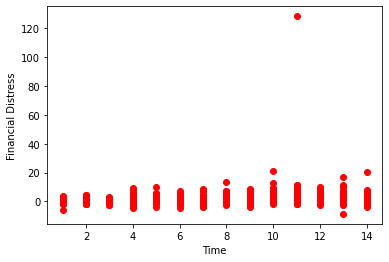

In [8]:
plt.scatter(df['Time'],df['Financial Distress'],color='red')
plt.xlabel('Time')
plt.ylabel('Financial Distress')

### Exploration des données

1- Cherchons le nombre d'entreprises uniques.

2- Vérifions combien de ces entreprises ont atteint un état de détresse (136 selon la description de Kaggle).

3- Cherchon une liste des noms de caractéristiques.

In [9]:
total_n = len(df.groupby('Company')['Company'].nunique())
print(total_n)

422


On identifie alors 422 entreprise uniques

In [10]:
distress_companies = df[df['Financial Distress'] < -0.5]
u_distress = distress_companies['Company'].unique()
print(u_distress.shape)

(136,)


On identifie effectivement 136 entreprises qui ont atteint un état de détresse financière. Cela indique que cet ensemble de données est déséquilibré et biaisées car on y compte 136 entreprises en difficulté financière contre 286 entreprises en bonne santé, c’est-à-dire que 136 entreprises de l’année sont en difficulté financière alors que 3546 entreprises en année sont en bonne santé. De ce fait, nous pourrions utilier le f-score comme critère d’évaluation du rendement.

In [11]:
# Obtenons une liste de noms de caractéristiques des entreprises.

feature_names = list(df.columns.values)[3:] 
print(feature_names)

['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39', 'x40', 'x41', 'x42', 'x43', 'x44', 'x45', 'x46', 'x47', 'x48', 'x49', 'x50', 'x51', 'x52', 'x53', 'x54', 'x55', 'x56', 'x57', 'x58', 'x59', 'x60', 'x61', 'x62', 'x63', 'x64', 'x65', 'x66', 'x67', 'x68', 'x69', 'x70', 'x71', 'x72', 'x73', 'x74', 'x75', 'x76', 'x77', 'x78', 'x79', 'x80', 'x81', 'x82', 'x83']


### Type d'apprentissage à appliquer

Au vu de ces données, on peut faire avancer les hypothèses suivantes: 
    
   1- Ces données peuvent être considérées comme un problème de classification.

   2- Ces données pourraient également être considérées comme un problème de régression, puis le résultat sera converti en classification.

   3- Ces données pourraient être considérées comme une classification multivarié des séries invariables.

Les questions à se poser sont les suivantes: 
    
   a- Quelles sont les caractéristiques les plus révélatrices de la détresse financière?

   b- Quels types de modèles d’apprentissage automatique sont les plus performants sur cet ensemble de données ?

### Choix du temps idéal pour séparer les données d'apprentissage et de test

Pour mener à bien cette analyse, il convient de scinder les données en apprentissage, validation et test. Ainsi, afin de choisir une bonne date pour séparer le train et les essais, nous devrions idéalement choisir une date qui permette à la plupart des entités d'apparaître à la fois dans les données du train et des essais.

Malheureusement, toutes les compagnies ne vivent pas pendant la même durée, donc si nous choisissons une date trop précoce ou trop tardive, nous risquons de retirer de nombreuses compagnies de la série de tests.

Générons un histogramme des comptages pour chaque période afin de pouvoir choisir un endroit raisonnable pour la suppression.

array([[<AxesSubplot:title={'center':'Time'}>]], dtype=object)

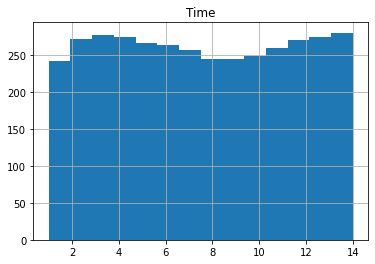

In [12]:
df.hist(column=['Time'], bins=14)

Nous constatons un léger déclin, puis une hausse dans l'histogramme autour de la période 10.

Les baisses impliquent qu'une entreprise disparaît de l'ensemble de données, donc si nous fixons notre réduction autour de t=10, nous devrions encore obtenir un nombre décent de cas de détresse dans les données de formation.

In [13]:
print(df.groupby(['Company'])['Time'].agg('min'))

    # Nous pouvons voir que la plupart des entreprises commencent à la période 1, 
    # mais il y en a qui commencent leur vie beaucoup plus tard.

Company
1       1
2       1
3       1
4       1
5       1
       ..
418    13
419    12
420     1
421     9
422     7
Name: Time, Length: 422, dtype: int64


### Vérifions maintenant si la détresse se produit-elle de manière uniforme dans le temps dans ces entreprises

array([[<AxesSubplot:title={'center':'Time'}>]], dtype=object)

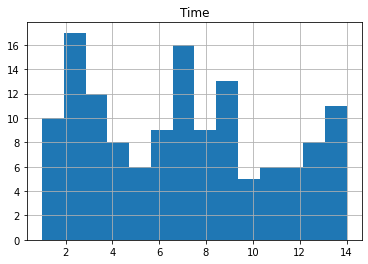

In [14]:
distress_companies.hist(column=['Time'], bins=14)

On constate que la fréquence de la détresse ne semble certainement pas être uniforme dans le temps.

Cela indique qu'il peut être malavisé d'obtenir des validations ou des jeux de tests en choisissant simplement certaines entreprises, car nous ne pouvons pas supposer que les différentes entreprises sont indépendantes. L'horodatage lui-même peut être un signal utile (c'est-à-dire si une certaine période représente un état de déclin macroéconomique pour une certaine industrie, ou l'économie dans son ensemble).

In [15]:
f80 = list(df.groupby('Company')['x80'].agg('mean'))
f80 = [int(c) for c in f80]

### Validation croisée: pour séparer les données en apprentissage, validation, test

In [16]:
# Generation de la base d'apprentissage et la bae test par validation croisée

datadict = {}
distress_dict = {}

for i in range (1, total_n+1):
    datadict[i] = {}
    distress_dict[i] = {}

print("Populating dictionary...")
for idx, row in df.iterrows():
    company = row['Company']
    time = int(row['Time'])
    
    datadict[company][time] = {}
    
    if row['Financial Distress'] < -0.5:
        distress_dict[company][time] = 1
    else:
        distress_dict[company][time] = 0
        
    for feat_idx, column in enumerate(row[3:]):
        feat = feature_names[feat_idx]
        datadict[company][time][feat] = column
        
# print('Dict population complete. Sample below:')
# print("\nData for company 1, time 1:")
# print(datadict[1][1])

# print("\nDistress history for company 1:")
# print(distress_dict[1])

print('We can encode categorical feature 80 as a one-hot vector with this many dimensions:')
print(len(list(set(f80))))

label_binarizer = LabelBinarizer()
label_binarizer.fit(range(max(f80)))
f80_oh = label_binarizer.transform(f80)

# print(f80_oh[0:5])

Populating dictionary...
We can encode categorical feature 80 as a one-hot vector with this many dimensions:
37


### Génération des données

In [17]:
# Make new features as np array. We'll even add x80 back!

def rolling_operation(time, train_array, datadict, distress_dict, feature_names, total_n,
                         lookback_periods):

    for company in range(1, total_n+1):
            
            all_periods_exist = True
            for j in range(0, lookback_periods):
                if not time-j in distress_dict[company]:
                    all_periods_exist = False
            if not all_periods_exist:
                continue
            
            distress_at_eop = distress_dict[company][time]
            new_row = [company]

            for feature in feature_names:
                if feature == 'x80':
                    continue
                feat_sum = 0.0
                variance_arr = []
                for j in range(0, lookback_periods):
                    feat_sum += datadict[company][time-j][feature]
                    variance_arr.append(datadict[company][time-j][feature])
                new_row.append(feat_sum)
                new_row.append(np.var(variance_arr))
                
            for j in range(0,len(f80_oh[0])):
                new_row.append(f80_oh[company-1][j])

            if len(new_row) == ((len(feature_names)-1)*2 + 1 + len(f80_oh[0])) : # we have a complete row
                new_row.append(distress_at_eop)
                new_row_np = np.asarray(new_row)
                train_array.append(new_row_np)
    

def custom_timeseries_cv(datadict, distress_dict, feature_names, total_n, val_time, test_time, 
                         lookback_periods, total_periods=14):

    # Train data
    train_array = []
    for _t in range(1, val_time+1):
        time = (val_time+1) -_t # Start from time period 10 and work backwards
        train_array_np = rolling_operation(time, train_array, datadict, distress_dict, feature_names, total_n,
                         lookback_periods)

    train_array_np = np.asarray(train_array)
    print(train_array_np.shape)
    # print(train_array_np[0])
    
    # Val data
    if val_time != test_time:
        val_array = []
        for time in range(val_time+1, test_time+1):
            val_array_np = rolling_operation(time, val_array, datadict, distress_dict, feature_names, total_n,
                         lookback_periods)

        val_array_np = np.asarray(val_array)
        print(val_array_np.shape)
        # print(val_array_np[0])
    else:
        val_array_np = None

    # Test data
    test_array = []
    # start from time period 11 and work forwards
    for time in range(test_time+1,total_periods+1):
        test_array_np = rolling_operation(time, test_array, datadict, distress_dict, feature_names, total_n,
                         lookback_periods)

    test_array_np = np.asarray(test_array)
    print(test_array_np.shape)
    # print(test_array_np[0])
    
    return train_array_np, val_array_np, test_array_np

# Generate our sets
train_array_np, val_array_np, test_array_np = custom_timeseries_cv(datadict, distress_dict, feature_names, total_n,
                                                     val_time=9, test_time=12, lookback_periods=3, total_periods=14)

(1678, 203)
(687, 203)
(499, 203)


In [18]:
X_train = train_array_np[:,0:train_array_np.shape[1]-1]
y_train = train_array_np[:,-1].astype(int)

X_val = val_array_np[:,0:val_array_np.shape[1]-1]
y_val = val_array_np[:,-1].astype(int)

X_test = test_array_np[:,0:test_array_np.shape[1]-1]
y_test = test_array_np[:,-1].astype(int)

np.set_printoptions(threshold=sys.maxsize)
print(X_train[0,:])
print(y_train)

print(X_val[0,:])
print(y_val)

print(X_test[0,:])
print(y_test)

[ 2.00000000e+00  4.84160000e+00  5.97729556e-03  7.18260000e-01
  3.66930467e-04  1.70750000e+00  2.57254689e-04  3.07451000e+00
  1.79494967e-02  9.67730000e-01  5.10969622e-04  9.34370000e-01
  2.40172822e-04  3.26607000e+00  3.11568702e-02  7.06260000e-01
  2.11975800e-04  1.67120000e+00  2.93949882e-03  8.59080000e-01
  9.40618667e-05  2.47056000e+00  5.89100067e-04  5.68560000e+01
  1.00793887e+01  1.29250000e+00  2.57254689e-04  3.97310000e+00
  7.73550889e-03  1.07744000e+01  3.44810300e+00  9.52770000e-01
  4.92798067e-04  8.75760000e+00  1.83738887e-01  6.80560000e-02
  8.40756422e-06  5.24840000e-02  1.99125982e-05  1.34072000e-01
  5.83302969e-05  3.72680000e+00  2.07546422e-02  1.90716000e+01
  2.33013109e+00  1.10259000e+00  1.80993620e-03  1.53617000e+00
  1.43273636e-03  5.55640000e+03  3.09414489e+04  3.96100000e+01
  1.04226889e-01  9.95560000e+00  3.29755936e-01  1.31819000e+00
  4.81916144e-02  1.71329000e-01  5.60041134e-04  1.66177000e+00
  5.82454896e-03  1.01653

In [19]:

from sklearn.linear_model import Ridge, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

def model_trial(model_type, hyperparam):
    if model_type in ['logistic-regression']:
        # Logistic Regression. Try 11, l2 penalty, understand one-vs-rest vs multinomial (cross-entropy) 
        model = LogisticRegression(penalty=hyperparam, solver='saga', max_iter=4000)
    elif model_type in ['decision-tree']:
        model = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=None)
    elif model_type in ['random-forest']:
        model = RandomForestClassifier(n_estimators=hyperparam)
    else:
        print("Warning: model {} not recognized.".format(model_type))
        
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)

    f1 = f1_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    print("Mean acc: %f" % model.score(X_val, y_val))
    print("F1: %f" % f1)
    print("Recall: %f" % recall)

In [20]:
print("-"*20 + "Logistic regression, l1:" + "-"*20)
model_trial('logistic-regression', 'l1')

print("-"*20 + "Logistic regression, l2:" + "-"*20)
model_trial('logistic-regression', 'l2')

print("-"*20 + "Decision tree:" + "-"*20)
model_trial('decision-tree', None)

for i in [2, 4, 10, 50, 100, 1000]:
    print("-"*20 + "Random forest, {} estimators:".format(i) + "-"*20)
    model_trial('random-forest', i)

--------------------Logistic regression, l1:--------------------


C:\Users\lenoa\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


Mean acc: 0.976710
F1: 0.000000
Recall: 0.000000
--------------------Logistic regression, l2:--------------------


C:\Users\lenoa\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


Mean acc: 0.976710
F1: 0.000000
Recall: 0.000000
--------------------Decision tree:--------------------
Mean acc: 0.928675
F1: 0.140351
Recall: 0.250000
--------------------Random forest, 2 estimators:--------------------
Mean acc: 0.970888
F1: 0.230769
Recall: 0.187500
--------------------Random forest, 4 estimators:--------------------
Mean acc: 0.967977
F1: 0.214286
Recall: 0.187500
--------------------Random forest, 10 estimators:--------------------
Mean acc: 0.970888
F1: 0.166667
Recall: 0.125000
--------------------Random forest, 50 estimators:--------------------
Mean acc: 0.975255
F1: 0.105263
Recall: 0.062500
--------------------Random forest, 100 estimators:--------------------
Mean acc: 0.973799
F1: 0.000000
Recall: 0.000000
--------------------Random forest, 1000 estimators:--------------------
Mean acc: 0.978166
F1: 0.117647
Recall: 0.062500


In [21]:
#!pip install lightgbm

### Les algorithmes de Machine Learning utilisés

In [22]:
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn import linear_model
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.cluster import KMeans
from lightgbm import LGBMClassifier

In [23]:
knn = KNeighborsClassifier(n_neighbors=15)
clf = knn.fit(X_train, y_train)
y_pred = clf.predict(X_test)
acc_knb_model=roc_auc_score(y_test, y_pred)*100
acc_knb_model

50.0

In [24]:
lr = LogisticRegression(C = 0.2)
clf1 = lr.fit(X_train, y_train)
y_pred1 = clf1.predict(X_test)
acc_log_reg=roc_auc_score(y_test, y_pred1)*100
acc_log_reg

C:\Users\lenoa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


50.0

In [25]:
clf2 = GaussianNB().fit(X_train, y_train)
y_pred2 = clf2.predict(X_test)
acc_nb=roc_auc_score(y_test, y_pred2)*100
acc_nb

51.95175438596491

In [26]:
clf3 = tree.DecisionTreeClassifier().fit(X_train, y_train)
y_pred3 = clf3.predict(X_test)
acc_dt=roc_auc_score(y_test, y_pred3)*100
acc_dt

66.12938596491229

In [27]:
clf4 = RandomForestClassifier(max_depth=5, random_state=0).fit(X_train, y_train)
y_pred4 = clf4.predict(X_test)
acc_rmf_model=roc_auc_score(y_test, y_pred4)*100
acc_rmf_model

49.6875

In [28]:
clf5 = SVC(gamma='auto').fit(X_train, y_train)
y_pred5 = clf5.predict(X_test)
acc_svm_model=roc_auc_score(y_test, y_pred5)*100
acc_svm_model

50.0

In [29]:
sgd_model=SGDClassifier()
sgd_model.fit(X_train,y_train)
sgd_pred=sgd_model.predict(X_test)
acc_sgd=round(sgd_model.score(X_train,y_train)*100,10)
acc_sgd

95.2920143027

In [30]:
xgb_model=XGBClassifier()
xgb_model.fit(X_train,y_train)
xgb_pred=xgb_model.predict(X_test)
acc_xgb=round(xgb_model.score(X_train,y_train)*100,10)
acc_xgb

C:\Users\lenoa\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:39:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


100.0

In [31]:
lgbm = LGBMClassifier()
lgbm.fit(X_train,y_train)
lgbm_pred=lgbm.predict(X_test)
acc_lgbm=round(lgbm.score(X_train,y_train)*100,10)
acc_lgbm

100.0

In [32]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest','Stochastic Gradient Decent','Naive Bayes','XGBoost','LightGBM','Decision Tree'],
    'Score': [acc_svm_model, acc_knb_model, acc_log_reg, 
              acc_rmf_model,acc_sgd,acc_nb,acc_xgb,acc_lgbm,acc_dt]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df

,Model
Score,
100.000000,XGBoost
100.000000,LightGBM
95.292014,Stochastic Gradient Decent
66.129386,Decision Tree
51.951754,Naive Bayes
50.000000,Support Vector Machines
50.000000,KNN
50.000000,Logistic Regression
49.687500,Random Forest


Le meilleur modèle de prévision de la détresse financière serait ici le gradient stochastique